In [11]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [12]:
data = pd.read_csv("datasets/diamonds.csv", index_col=0)
data.sample(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
13804,1.03,Fair,E,SI1,65.1,58.0,5624,6.35,6.24,4.10
26990,2.01,Ideal,F,SI2,62.2,56.0,17078,8.05,8.08,5.02
9163,1.06,Ideal,G,SI2,62.2,55.0,4541,6.56,6.53,4.07
36880,0.50,Ideal,H,SI2,62.9,57.0,958,5.04,5.01,3.16
49733,0.70,Premium,I,VS2,60.8,59.0,2154,5.68,5.71,3.46
42184,0.56,Premium,H,SI1,61.3,60.0,1286,5.28,5.23,3.22
29479,0.40,Premium,G,SI1,61.4,60.0,702,4.67,4.71,2.88
45924,0.53,Ideal,G,VS1,62.6,54.0,1721,5.16,5.19,3.24
52262,0.74,Ideal,E,SI1,62.6,56.0,2489,5.74,5.70,3.58
44741,0.47,Ideal,G,VVS2,62.2,53.0,1618,5.00,5.04,3.12


In [13]:
data.shape

(53940, 10)

In [14]:
data = data.sample(frac=0.2)

In [15]:
data.shape

(10788, 10)

In [16]:
data.reset_index(inplace=True, drop=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.41,Ideal,D,VS2,62.4,54.0,1076,4.78,4.74,2.97
1,1.05,Very Good,H,VS2,59.0,59.0,5370,6.68,6.71,3.95
2,0.30,Premium,D,VS1,61.2,59.0,732,4.34,4.29,2.64
3,0.32,Ideal,G,VVS2,61.1,55.0,936,4.45,4.42,2.71
4,1.59,Premium,H,SI2,62.6,59.0,9385,7.42,7.40,4.64


In [17]:
correlation = data.corr()
correlation

,carat,depth,table,price,x,y,z
carat,1.000000,0.046639,0.174884,0.924383,0.975871,0.974968,0.902320
depth,0.046639,1.000000,-0.314972,0.007660,-0.007082,-0.010045,0.105166
table,0.174884,-0.314972,1.000000,0.124902,0.190640,0.184867,0.133029
price,0.924383,0.007660,0.124902,1.000000,0.887525,0.888787,0.817860
x,0.975871,-0.007082,0.190640,0.887525,1.000000,0.998812,0.918525
y,0.974968,-0.010045,0.184867,0.888787,0.998812,1.000000,0.918370
z,0.902320,0.105166,0.133029,0.817860,0.918525,0.918370,1.000000


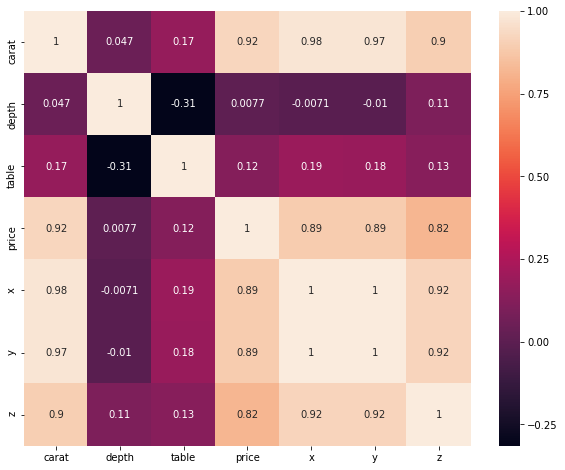

In [18]:
plt.subplots(figsize=(10,8))
sns.heatmap(correlation, annot=True)

plt.show()

In [19]:
data['cut'].unique()

array(['Ideal', 'Very Good', 'Premium', 'Good', 'Fair'], dtype=object)

In [20]:
data['color'].unique()

array(['D', 'H', 'G', 'F', 'E', 'J', 'I'], dtype=object)

In [21]:
data['clarity'].unique()

array(['VS2', 'VS1', 'VVS2', 'SI2', 'SI1', 'I1', 'VVS1', 'IF'],
      dtype=object)

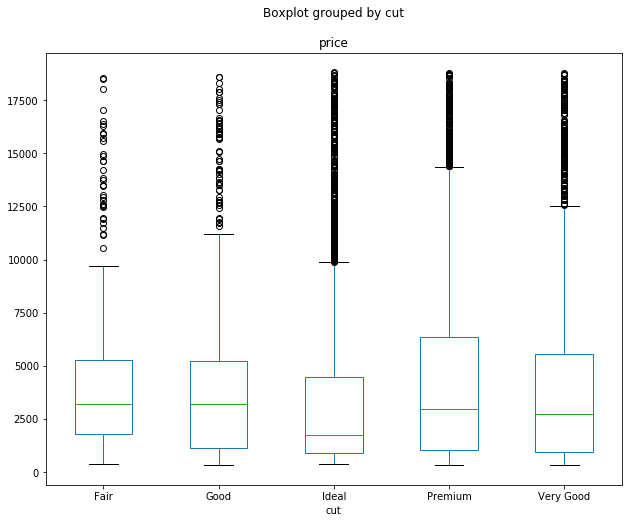

In [22]:
data.boxplot(by='cut', column=['price'], grid=False, figsize=(10,8))

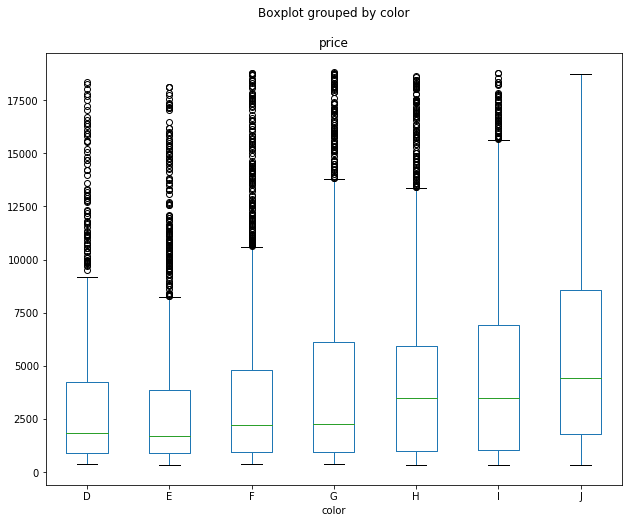

In [23]:
data.boxplot(by='color', column=['price'], grid=False, figsize=(10,8))

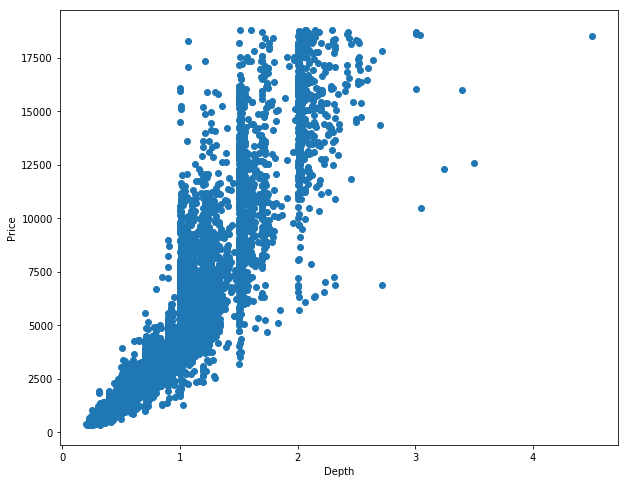

In [24]:
plt.subplots(figsize=(10,8))

plt.scatter(data['carat'], data['price'])

plt.xlabel('Depth')
plt.ylabel('Price')

plt.show()

In [25]:
clarity_dict = {"IF": 7, "VVS1": 6, "VVS2": 5, "VS1": 4, "VS2": 3, "SI1": 2, "SI2": 1, "I1": 0}
data['clarity'].replace(clarity_dict, inplace=True)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.41,Ideal,D,3,62.4,54.0,1076,4.78,4.74,2.97
1,1.05,Very Good,H,3,59.0,59.0,5370,6.68,6.71,3.95
2,0.30,Premium,D,4,61.2,59.0,732,4.34,4.29,2.64
3,0.32,Ideal,G,5,61.1,55.0,936,4.45,4.42,2.71
4,1.59,Premium,H,1,62.6,59.0,9385,7.42,7.40,4.64


In [26]:
data = pd.get_dummies(data, columns=['cut', 'color'])
data.head() 

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.41,3,62.4,54.0,1076,4.78,4.74,2.97,0,0,1,0,0,1,0,0,0,0,0,0
1,1.05,3,59.0,59.0,5370,6.68,6.71,3.95,0,0,0,0,1,0,0,0,0,1,0,0
2,0.30,4,61.2,59.0,732,4.34,4.29,2.64,0,0,0,1,0,1,0,0,0,0,0,0
3,0.32,5,61.1,55.0,936,4.45,4.42,2.71,0,0,1,0,0,0,0,0,1,0,0,0
4,1.59,1,62.6,59.0,9385,7.42,7.40,4.64,0,0,0,1,0,0,0,0,0,1,0,0


In [28]:
NUM_FEATURES = ['carat', 'depth', 'table', 'x', 'y', 'z']
numeric_df = data[NUM_FEATURES]

numeric_df.describe()

,carat,depth,table,x,y,z
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,0.797986,61.731563,57.446459,5.728209,5.731022,3.538578
std,0.479930,1.425398,2.242221,1.127911,1.120297,0.750532
min,0.200000,51.000000,51.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.680000,5.690000,3.510000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000
max,4.500000,78.200000,73.000000,10.230000,10.160000,31.800000


In [29]:
from sklearn.preprocessing import scale
#ML algorithms don't work well with different Mean and SD

#Standardize numeric data by subtracting the mean and dividing by SD
numeric_array = scale(numeric_df)
numeric_array[:5]

array([[-0.80845877,  0.46896953, -1.53714529, -0.84071614, -0.88464668,
        -0.75760148],
       [ 0.52513053, -1.91644008,  0.69289035,  0.84389186,  0.87389635,
         0.54819893],
       [-1.03766943, -0.37293974,  0.69289035, -1.23083589, -1.28634433,
        -1.19730977],
       [-0.99599477, -0.44309885, -1.09113816, -1.13330595, -1.17029834,
        -1.10403832],
       [ 1.65034651,  0.60928774,  0.69289035,  1.50000234,  1.48983274,
         1.46758901]])

In [32]:
numeric_df = pd.DataFrame(numeric_array, columns=numeric_df.columns)
numeric_df.describe()

,carat,depth,table,x,y,z
count,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04
mean,-4.223968e-16,-8.108024e-15,-1.606438e-15,4.272244e-16,-1.097472e-15,9.167136e-16
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00
min,-1.246043e+00,-7.529169e+00,-2.875167e+00,-5.078835e+00,-5.115862e+00,-4.714976e+00
25%,-8.292961e-01,-5.132580e-01,-6.451310e-01,-9.027806e-01,-9.024999e-01,-8.375484e-01
50%,-2.041761e-01,4.801489e-02,-1.991239e-01,-4.274393e-02,-3.661832e-02,-3.807880e-02
75%,5.042932e-01,5.391286e-01,6.928903e-01,7.197628e-01,7.221439e-01,6.547949e-01
max,7.714010e+00,1.155411e+01,6.936990e+00,3.991449e+00,3.953578e+00,3.765691e+01


In [33]:
data.drop(NUM_FEATURES, inplace=True, axis=1)
data.head()

KeyError: "labels ['carat' 'depth' 'table' 'x' 'y' 'z'] not contained in axis"

In [34]:
data = pd.concat([data, numeric_df], axis=1)
data.shape

(10788, 20)

In [35]:
data.to_csv('datasets/diamond_processed_venkat.csv', index=False)
!ls datasets/

916e0d48-7-dataset.zip         diamond_processed_venkat.csv
Mall_Customers.csv             diamonds.csv
_DS_Store                      diamonds_processed.csv
auto-mpg.csv                   exams.csv
auto_processed.csv             gender_voice_dataset.csv
bbc-text.csv                   german_credit_data_dataset.csv
boston_data.csv                std
cars.csv                       wine.csv


In [36]:
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1)
Y = data['price']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [38]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [39]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_pred = lr.predict(x_test)
y_pred

array([  547.53277354, 10114.09288753,  9895.2793989 , ...,
        2056.49173009, 11001.7278803 ,   897.61157963])

In [41]:
score = lr.score(x_train, y_train)
score

0.911608633119782

In [42]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test, y_pred)
r2score

0.9181588035959635

In [43]:
lr.coef_

array([ 4.79761781e+02, -7.67948358e+02, -4.90018879e+00,  3.03464458e+02,
        2.74768589e+02,  1.94615499e+02,  8.63346430e+02,  5.91826077e+02,
        5.37374194e+02,  3.08530238e+02, -1.64432190e+02, -6.43897180e+02,
       -1.49274757e+03,  5.21644140e+03, -7.46199853e+01, -2.94148260e+01,
       -2.14598113e+03,  1.14246060e+03, -9.56572852e+00])

In [44]:
lr.intercept_

2042.7392503504664

In [ ]:
1. Getting the data ready - Preprocessing, Splitting Feature Vectors, Target Variable
2. Splitting the data into Training and Test Set
3. Initiation of Model and fitting(Training) your data into model
4. Prediction for Test data
5. Validation - identifying the r2_score (accuracy) of your data